In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

C:\Users\Chamodi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
#data = pd.read_csv("Outlier_Filtered_Dataset.csv")
output_file_path = "Outlier_Filtered_Dataset.csv"
processed_data = pd.read_csv(output_file_path, parse_dates=['instance_date'])

In [12]:
processed_data

,transaction_id,procedure_id,trans_group_id,trans_group_en,procedure_name_en,instance_date,property_type_id,property_type_en,property_usage_en,reg_type_id,...,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,z_score,modified_z
0,2-13-2010-1387,13,2,Mortgages,Mortgage Registration,2010-03-30,4,Villa,Residential,1,...,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,1505000.0,4542.71,0.001528,0.591418
1,2-13-2015-7852,13,2,Mortgages,Mortgage Registration,2015-10-26,4,Villa,Residential,1,...,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,1260000.0,3996.07,-0.053268,0.273800
2,1-110-2007-100813,110,1,Sales,Lease to Own Registration,2007-11-22,4,Villa,Residential,1,...,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,661888.0,2568.54,-0.187038,-0.501593
3,1-11-2007-101072,11,1,Sales,Sell,2007-11-22,4,Villa,Residential,1,...,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,2300000.0,5045.74,0.179333,1.622056
4,1-11-2007-100644,11,1,Sales,Sell,2007-08-01,4,Villa,Residential,1,...,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,1850000.0,4058.53,0.078689,1.038676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791494,1-102-2023-8646,102,1,Sales,Sell - Pre registration,2023-02-23,3,Unit,Residential,0,...,Sports City Swimming Academy,Dubai Internet City,Mall of the Emirates,Studio,1,40.88,639000.0,15631.12,-0.192157,-0.531265
791495,1-11-2017-5101,11,1,Sales,Sell,2017-04-10,3,Unit,Residential,1,...,Dubai International Airport,Rashidiya Metro Station,City Centre Mirdif,Studio,0,44.00,320000.0,7272.73,-0.263503,-0.944816
791496,1-45-2015-546,45,1,Sales,Sell Development,2015-10-05,3,Unit,Commercial,1,...,IMG World Adventures,Unknown,City Centre Mirdif,Office,1,122.65,750000.0,6114.96,-0.167332,-0.387364
791497,1-11-2014-20712,11,1,Sales,Sell,2014-09-07,3,Unit,Residential,1,...,Dubai International Airport,Rashidiya Metro Station,City Centre Mirdif,1 B/R,0,69.00,530000.0,7681.16,-0.216536,-0.672572


In [13]:
# Convert 'rooms_en' to numeric (extract number from "1 B/R", "2 B/R", etc.)
processed_data['rooms_numeric'] = pd.to_numeric(processed_data['rooms_en'].str.extract('(\d+)')[0], errors='coerce')

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Drop rows with any remaining NaNs (from division)
processed_data.dropna(inplace=True)

In [16]:
# Define features and target
features = ['has_parking', 'procedure_area', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en', 'property_usage_en']
target = 'actual_worth'

In [18]:
# Encode categorical features
processed_data = processed_data[features + [target]].copy()
label_encoders = {}

for col in features:
    le = LabelEncoder()
    processed_data[col] = le.fit_transform(processed_data[col].astype(str))
    label_encoders[col] = le

In [19]:
X = processed_data[features]
y = processed_data[target]

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

In [26]:
# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# Predict
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

In [28]:
# Evaluate
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - R² Score: {r2:.4f}")
    print(f"{name} - RMSE: {rmse:,.2f}\n")

evaluate_model("Linear Reggression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

Linear Reggression - R² Score: 0.0402
Linear Reggression - RMSE: 2,979,745.35

Random Forest - R² Score: 0.6478
Random Forest - RMSE: 1,805,028.62

XGBoost - R² Score: 0.1954
XGBoost - RMSE: 2,728,112.22



In [30]:
# Create a DataFrame with all predictions
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': lr_preds,
    'Random Forest': rf_preds,
    'XGBoost': xgb_preds
})

In [40]:
# Set up the figure with 3 subplots
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

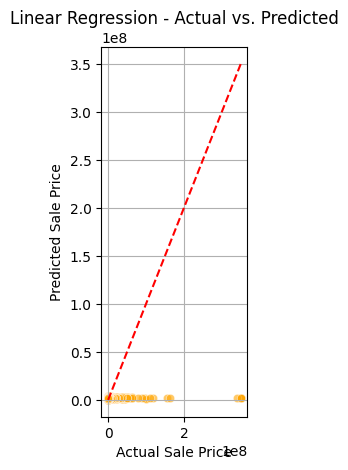

In [45]:
# Linear Regression Plot
plt.subplot(1, 3, 1)
sns.scatterplot(data=results_df, x='Actual', y='Linear Regression', color='orange', alpha=0.6)
plt.plot([results_df.Actual.min(), results_df.Actual.max()],
         [results_df.Actual.min(), results_df.Actual.max()],
         '--', color='red')
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)

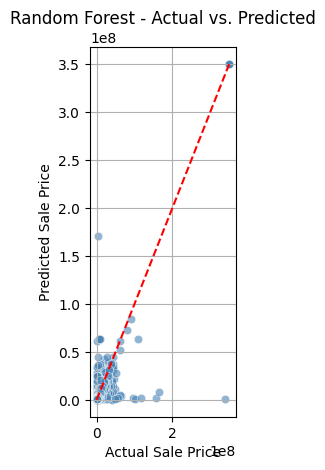

In [35]:
# Random Forest Plot
plt.subplot(1, 3, 2)
sns.scatterplot(data=results_df, x='Actual', y='Random Forest', color='steelblue', alpha=0.6)
plt.plot([results_df.Actual.min(), results_df.Actual.max()],
         [results_df.Actual.min(), results_df.Actual.max()],
         '--', color='red')
plt.title('Random Forest - Actual vs. Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)

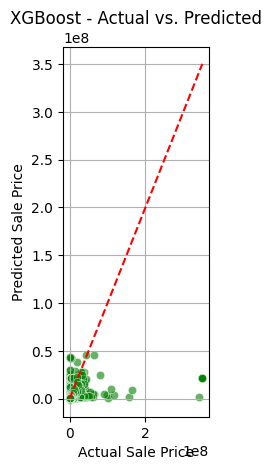

In [36]:
# XGBoost Plot
plt.subplot(1, 3, 3)
sns.scatterplot(data=results_df, x='Actual', y='XGBoost', color='green', alpha=0.6)
plt.plot([results_df.Actual.min(), results_df.Actual.max()],
         [results_df.Actual.min(), results_df.Actual.max()],
         '--', color='red')
plt.title('XGBoost - Actual vs. Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)

In [37]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

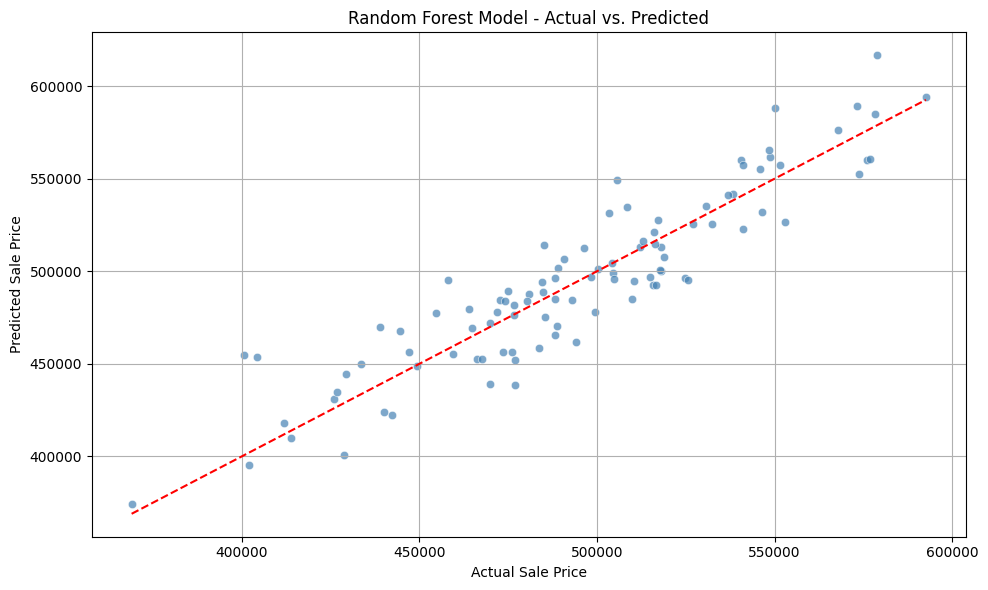

In [170]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='steelblue', alpha=0.7)
plt.plot([results_df.Actual.min(), results_df.Actual.max()],
         [results_df.Actual.min(), results_df.Actual.max()],
         '--', color='red')
plt.title('Random Forest Model - Actual vs. Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()